# DESAFIO 1.

#### A tarefa é abrir o conjunto de dados `SATscore2015.csv`, pesquisar a estrutura dos dados e responder:

#### Exercício 1: O que os dados descrevem?

In [1]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")

In [2]:
df_sat = pd.read_csv('SATscore2015.csv')

In [3]:
df_sat.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   State             53 non-null     object
 1   Critical Reading  53 non-null     int64 
 2   Mathematics       53 non-null     int64 
 3   Writing           53 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ KB


In [4]:
df_sat.dtypes

State               object
Critical Reading     int64
Mathematics          int64
Writing              int64
dtype: object

In [5]:
df_sat.head(5)

,State,Critical Reading,Mathematics,Writing
0,Alabama,545,538,533
1,Alaska,509,503,482
2,Arizona,523,527,502
3,Arkansas,568,569,551
4,California,495,506,491


In [6]:
df_sat.shape

(53, 4)

In [7]:
df_sat.size

212

#### Exercício 2: É visto algum problema nos dados? Estão completos?

In [8]:
df_sat.empty

False

In [9]:
df_sat.style

,State,Critical Reading,Mathematics,Writing
0,Alabama,545,538,533
1,Alaska,509,503,482
2,Arizona,523,527,502
3,Arkansas,568,569,551
4,California,495,506,491
5,Colorado,582,587,567
6,Connecticut,504,506,504
7,Delaware,462,461,445
8,District of Columbia,441,440,432
9,Florida,486,480,468


In [10]:
# verificar se tem NULL, 
df_sat.isnull()
100*(df_sat.isnull().sum()/df_sat.shape[0])

State               0.0
Critical Reading    0.0
Mathematics         0.0
Writing             0.0
dtype: float64

In [11]:
# verificar se há algum valor <= 0
qtd = 0
for col in ['Critical Reading', 'Mathematics', 'Writing']:
    if (df_sat[col] <= 0).any():
        print(df_sat[col])
    else:
        print("Todos valores > 0 da coluna {}".format(col))

Todos valores > 0 da coluna Critical Reading
Todos valores > 0 da coluna Mathematics
Todos valores > 0 da coluna Writing


In [12]:
# transformar coluna State em String
df_sat['State'] = df_sat['State'].astype('str')

In [13]:
df_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   State             53 non-null     object
 1   Critical Reading  53 non-null     int64 
 2   Mathematics       53 non-null     int64 
 3   Writing           53 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ KB


In [14]:
df_sat['State'][13]

'Illinois'

#### Exercício 3: O que as linhas representam? E as colunas?

In [15]:
df_sat.columns

Index(['State', 'Critical Reading', 'Mathematics', 'Writing'], dtype='object')

In [16]:
df_sat.index

RangeIndex(start=0, stop=53, step=1)

O SAT (uma vez sigla para Scholastic Aptitude Test ou Scholastic Assessment Test) é um exame educacional padronizado nos Estados Unidos aplicado a estudantes do ensino médio, que serve de critério para admissão nas universidades norte-americanas (semelhante ao Exame Nacional do Ensino Médio brasileiro, embora as universidades não se baseiem somente nas notas dos alunos para aprová-los)

O SAT Reasoning Test é composto por 3 secções:
Matemática
Leitura crítica
Redação

Score de 200 a 800, Reading + Mathematics aprova a partir de 1060, Writing é avaliado separadamente
Referência: https://www.princetonreview.com/college/sat-information

In [17]:
# fç acima / abaixo médias
def AvgEvaluation(df, Reading, Math):
    Main_Score = Reading+Math
    result = 'Over Average' if Main_Score >= 1060 else 'Under Average' 
    return result

#### Exercício 4: Visualize o dataframe.

In [18]:
df_sat.values

array([['Alabama', 545, 538, 533],
       ['Alaska', 509, 503, 482],
       ['Arizona', 523, 527, 502],
       ['Arkansas', 568, 569, 551],
       ['California', 495, 506, 491],
       ['Colorado', 582, 587, 567],
       ['Connecticut', 504, 506, 504],
       ['Delaware', 462, 461, 445],
       ['District of Columbia', 441, 440, 432],
       ['Florida', 486, 480, 468],
       ['Georgia', 490, 485, 475],
       ['Hawaii', 487, 508, 477],
       ['Idaho', 467, 463, 442],
       ['Illinois', 599, 616, 587],
       ['Indiana', 496, 499, 478],
       ['Iowa', 589, 600, 566],
       ['Kansas', 588, 592, 568],
       ['Kentucky', 588, 587, 574],
       ['Louisiana', 563, 559, 553],
       ['Maine', 468, 473, 451],
       ['Maryland', 491, 493, 478],
       ['Massachusetts', 516, 529, 507],
       ['Michigan', 594, 609, 585],
       ['Minnesota', 595, 607, 576],
       ['Mississippi', 580, 563, 570],
       ['Missouri', 596, 599, 582],
       ['Montana', 561, 556, 538],
       ['Nebraska', 589

#### Exercício 5: Crie histogramas das notas de "Critical Reading", "Mathematics" e "Writing".

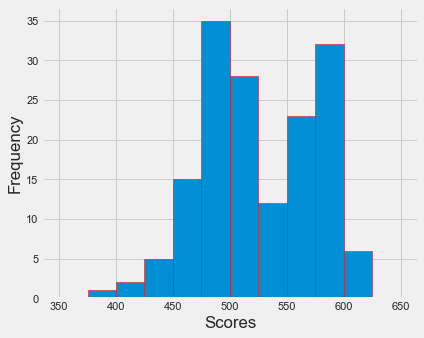

In [162]:
# todos os scores
# obs.: no final a conclusão geral com o desenho da tendência

df_sat_geral = pd.melt(df_sat, id_vars=['State'], value_name='Scores', var_name='Discipline')

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

plt.hist(df_sat_geral['Scores'], bins=[350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650], edgecolor='red')

plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.show()


#### 5.1 Critical Reading.

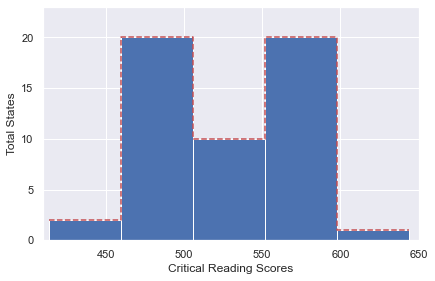

In [179]:
sns.set()
plt.hist(df_sat['Critical Reading'], bins=[414, 460, 460, 506, 506, 552, 552, 598, 598, 644])
plt.plot([414, 460, 460, 506, 506, 552, 552, 598, 598, 644], [2, 2, 20, 20, 10, 10, 20, 20, 1, 1] , 'r--')
plt.xlabel('Critical Reading Scores')
plt.axis([410, 650, 0, 23])
plt.ylabel('Total States')
plt.show()


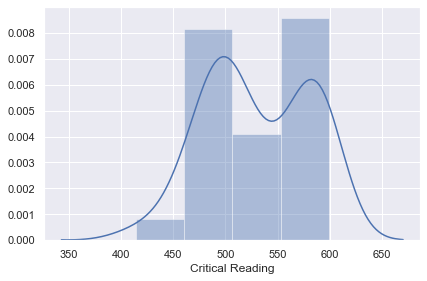

In [170]:
sns.distplot(df_sat['Critical Reading'])

#### 5.2 Mathematics

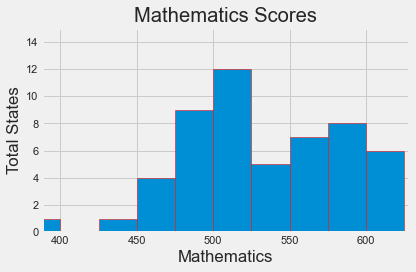

In [178]:
plt.style.use('fivethirtyeight')
plt.hist(df_sat['Mathematics'], bins=[375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650], edgecolor='red')
plt.title('Mathematics Scores')
plt.xlabel('Mathematics')
plt.ylabel('Total States')
plt.axis([388, 628, 0, 15])
plt.tight_layout()

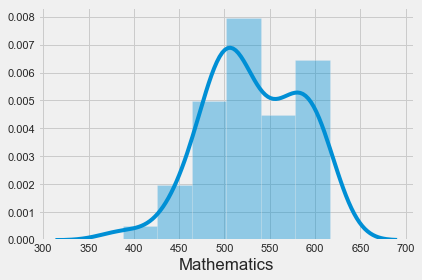

In [165]:
sns.distplot(df_sat['Mathematics'])

#### 5.3 Writing.

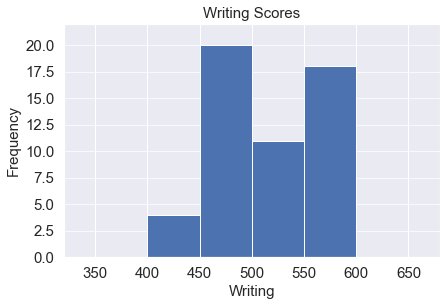

In [181]:
plt.hist(df_sat['Writing'], bins=[350, 400, 450, 500, 550, 600, 650])
#plt.axis([412, 592, 0, 22])
plt.axis([320, 680, 0, 22])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Writing',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Writing Scores',fontsize=15)
plt.show()

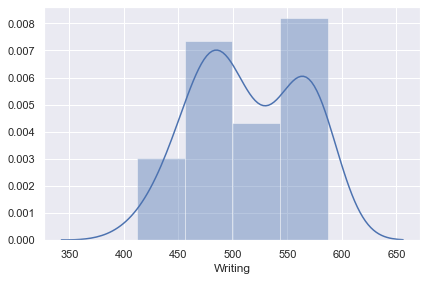

In [169]:
sns.distplot(df_sat['Writing'])

#### Exercício 6: Imprima as médias e os desvios padrão de cada uma das disciplinas avaliadas.

In [42]:

for col in ['Critical Reading', 'Mathematics', 'Writing']:
    print('{} Discipline:'.format(col))
    print('   {} Mean: {:.2f}'.format(col, df_sat[col].mean()))
    print('   {} Standard Deviation: {:.2f}\n'.format(col, df_sat[col].std()))


Critical Reading Discipline:
   Critical Reading Mean: 530.08
   Critical Reading Standard Deviation: 49.39

Mathematics Discipline:
   Mathematics Mean: 531.96
   Mathematics Standard Deviation: 51.90

Writing Discipline:
   Writing Mean: 514.15
   Writing Standard Deviation: 48.17



#### Exercício 7: Para cada disciplina, calcule o estado que obteve as maiores notas.

In [182]:
# df_sat.loc[(df_sat['Mathematics'] == df_sat['Mathematics'].max())]
# df_sat.max(axis=0)

for col in ['Critical Reading', 'Mathematics', 'Writing']:
    maximum = df_sat[col].max()
    df_result_max = df_sat.loc[(df_sat[col] == maximum), 'State'].values[0]
    print('O Estado com maior pontuação de {} é o {} que possui Score {}'.format(col, df_result_max, maximum))


O Estado com maior pontuação de Critical Reading é o Illinois que possui Score 599
O Estado com maior pontuação de Mathematics é o Illinois que possui Score 616
O Estado com maior pontuação de Writing é o Illinois que possui Score 587


#### Exercício 8: Selecione os estados em que, pelo menos, uma nota supera o corte dos 600 pontos.

In [44]:
 df_sat.loc[  ( (df_sat['Critical Reading']>600) | (df_sat['Mathematics']>600) | (df_sat['Writing']>600) )  ]

,State,Critical Reading,Mathematics,Writing
13,Illinois,599,616,587
22,Michigan,594,609,585
23,Minnesota,595,607,576
34,North Dakota,597,608,586
51,Wisconsin,591,605,575


#### Exercício 9: Crie gráficos de caixa para a distribuição das notas de cada uma das disciplinas  e os arranje em uma única figura, considere importar o pacote "seaborn".

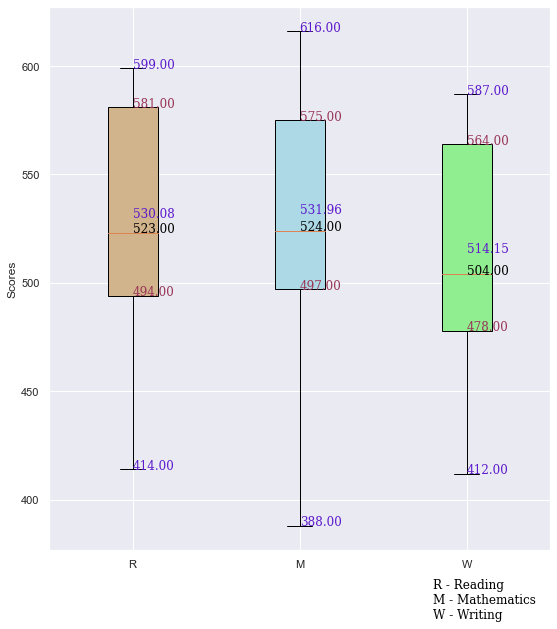

In [70]:
sns.set()

Read = df_sat['Critical Reading']
Math = df_sat['Mathematics']
Write = df_sat['Writing']

Read_d = Read.describe()
Math_d = Math.describe()
Write_d = Write.describe()

s_describe = {'E': Read_d, 'M': Math_d, 'W': Write_d}

font_1 = {'family':'serif', 'color':'#993556'}
font_2 = {'family':'serif', 'color':'#5C1BCC'}
font_3 = {'family':'serif', 'color':'000', 'size':12}

plt.figure(figsize=(8, 10))
bplot = plt.boxplot([Read, Math, Write], vert=True, patch_artist=True, labels=['Read', 'Math', 'Write'])


# fill with colors
colors = ['tan', 'lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel('Scores')

i = 1
for ax in s_describe:
    plt.text(i, s_describe[ax]['mean'], '{0:.2f}'.format(s_describe[ax]['mean']), 
             fontdict=font_2)
    plt.text(i, s_describe[ax]['25%'], '{0:.2f}'.format(s_describe[ax]['25%']) ,
             fontdict=font_1)  
    plt.text(i, s_describe[ax]['50%'], '{0:.2f}'.format(s_describe[ax]['50%']), 
            fontdict=font_3)
    plt.text(i, s_describe[ax]['75%'], '{0:.2f}'.format(s_describe[ax]['75%']),
             fontdict=font_1)
    plt.text(i, s_describe[ax]['max'], '{0:.2f}'.format(s_describe[ax]['max']),
         fontdict=font_2)
    plt.text(i, s_describe[ax]['min'], '{0:.2f}'.format(s_describe[ax]['min']),
         fontdict=font_2)   
    i += 1

plt.xticks([1, 2, 3], ['R', 'M', 'W'])
plt.text(2.8, 345, 'R - Reading\nM - Mathematics\nW - Writing',
         horizontalalignment='left', fontdict=font_3)

plt.show()

#### Exercício 10: Plote uma dispersão das notas das três displinas e discuta as relações encontradas.

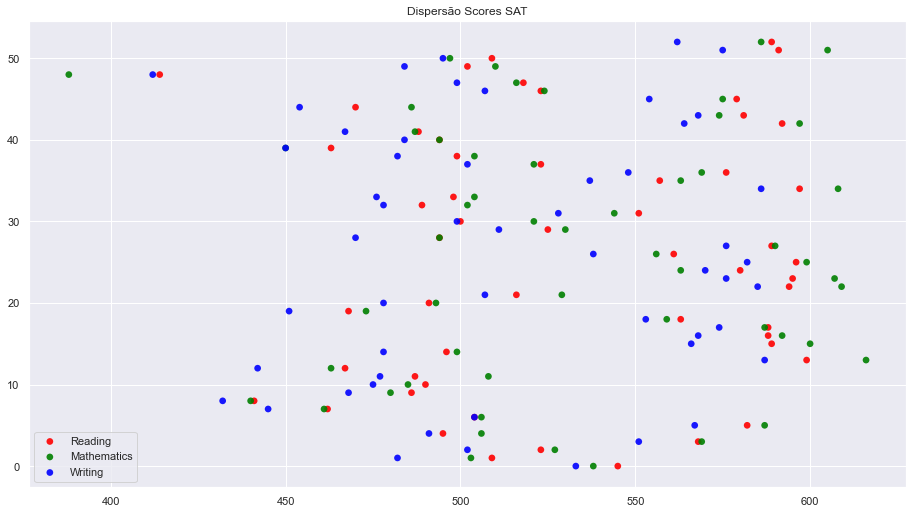

In [209]:
# Create data

g1 = df_sat['Critical Reading']
g2 = df_sat['Mathematics']
g3 = df_sat['Writing']

data = (g1, g2, g3)
colors = ("red", "green", "blue")
groups = ("Reading", "Mathematics", "Writing")

# Create plot
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)

for data, color, group in zip(data, colors, groups):
    x = data
    y = np.arange(53)
    ax.scatter(x, y, alpha=0.9, c=color, edgecolors='none', s=45, label=group)

plt.title('Dispersão Scores SAT')
plt.legend(loc=3)

plt.show()

#### Exercício 11: Plote a matriz de correlação das notas das três disciplinas. (Tente plotar na forma de heatmap). O que se pode concluir a partir destas correlações?

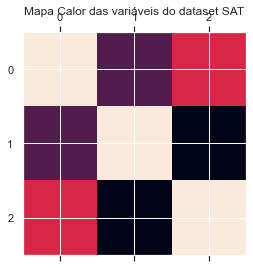

In [326]:
plt.matshow(df_sat.corr())
plt.title('Mapa Calor das variáveis do dataset SAT')
plt.show()

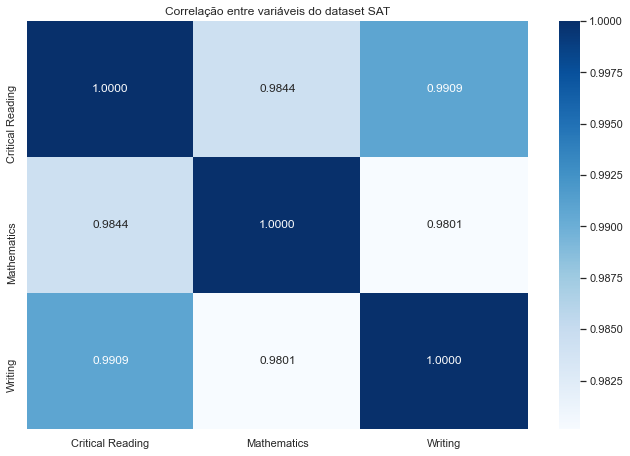

In [188]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_sat.corr(),
            annot = True,
            fmt = '.4f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset SAT')
plt.show()

</p><body>
    <p>A correlação entre todas as pontuações é alta, acima de 0,98, o que indica forte correlação, quanto mais próximo o valor for de 1, mais forte é a correlação entre as variáveis.</p>
    <p>A correlação entre as pontuações Critical Reading e Writing é superior a correlação destas, com a Mathematics, o que indica, que quanto melhor a leitura, maior a correlação com a escrita.</p>
</body>

#### 12. Imprima o máximo e o mínimo de cada coluna.

In [136]:
for col in ['Critical Reading', 'Mathematics', 'Writing']:
    print('{} Discipline:'.format(col))
    print('   {} Máximo: {:.1f}'.format(col, df_sat[col].max()))
    print('   {} Mínimo: {:.1f}\n'.format(col, df_sat[col].min()))

Critical Reading Discipline:
   Critical Reading Máximo: 599.0
   Critical Reading Mínimo: 414.0

Mathematics Discipline:
   Mathematics Máximo: 616.0
   Mathematics Mínimo: 388.0

Writing Discipline:
   Writing Máximo: 587.0
   Writing Mínimo: 412.0



#### Exercício 13: A partir das análises feitas, quais insights você pôde obter dos dados analisados? É possível observar alguma relação entre as variáveis? Quais dados/análises te permitiram chegar a esta conclusão?

<body>
    <h5>Análises Realizadas (09/10) - Itens observados: </h5>
    <ul>
        <li>Estado de melhor desempenho Illinois</li>
        <li>Maior Dispersão de Score pertinente à disciplina Matemática</li>
        <li>Todas são Disciplinas possuem distribuição bi-modais</li>
        <li>Sendo duas grandes concentrações 475 a 500 / 560 a 580</li>
        <li>Matemática foi a única disciplina, que apresentou Scores acima de 600 e abaixo de 400</li>
        <li>Há forte correlação entre as pontuações, ainda maior entre as de escrita e de leitura</li>
    </ul>
</body>


#### Exercício 14: Se você tivesse mais dados à disposição, quais informações você utilizaria para enriquecer a sua análise?

<p>Quantidade de alunos, que participaram dos exames no ano, assim poderíamos obter um score individual.</p>
<p>Quantidade de alunos, que ingressaram em alguma universidade.</p>
<p>Quantidade de alunos, que fizeram o exame de Writing.</p>
<p>Identificar se os alunos que estão na segunda torre, que tiveram score > 550, estão em condições mais favoráveis financeiras IDH</p>
<p>Identificar posicionamento da escola onde os alunos obtiveram as maiores e as menores notas</p> 

<body>
    <h4>CONCLUSÃO</h4>
    <h5>Característica Geral Bi-Modal da dispersão</h5>
    <h6>Conforme abaixo demonstrado</h6>
</body>

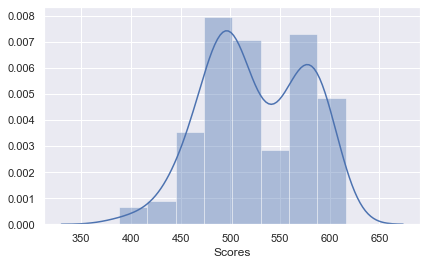

In [150]:
# distriuição bi-modal - utilizando o 'melt' de todas as disciplinas
sns.distplot(df_sat_geral['Scores'])